In [ ]:
Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [66]:
df=pd.read_csv('diabetes.csv')

In [67]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [68]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Dataset does not have missing values and all the values are numeric and in Integer and Float format respectively.

<AxesSubplot: >

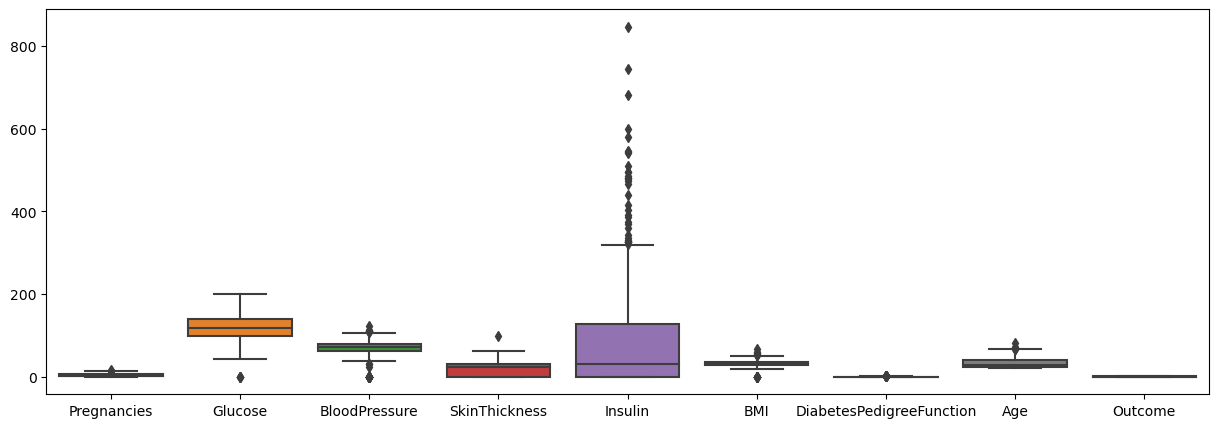

In [70]:
plt.subplots(figsize=(15, 5))
sns.boxplot(data=df)

## Dataset contains the outlier. Feature Insulin have outliers. We have to perform Standardization.

In [71]:
scaler = StandardScaler()

In [72]:
scaled_data = scaler.fit_transform(df)

In [73]:
df1 = pd.DataFrame(scaled_data, columns=df.columns)

In [74]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896


<AxesSubplot: >

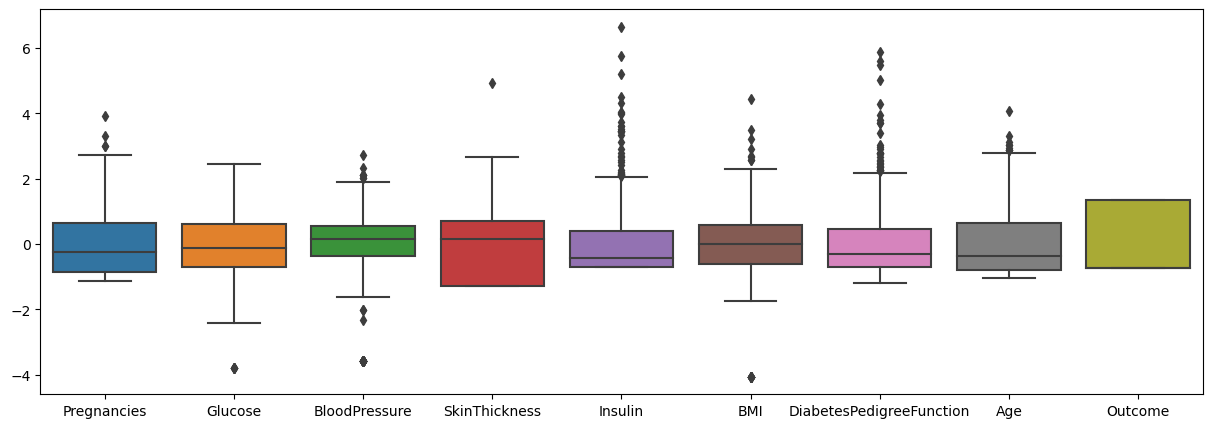

In [75]:
plt.subplots(figsize=(15, 5))
sns.boxplot(data=df1)

In [ ]:
Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [76]:
#independent features
X=df.iloc[:,:-1]
#dependent features
y=df.iloc[:,-1]

In [77]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [78]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score , classification_report

## WE Are doing Prepruning

In [79]:
parameter = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [80]:
treeclassifier=DecisionTreeClassifier()
clf=GridSearchCV(treeclassifier,param_grid=parameter,cv=5,scoring='accuracy')

In [100]:
## Train the data
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [82]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [83]:
y_pred=clf.predict(X_test)

In [ ]:
Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [84]:
score=accuracy_score(y_pred,y_test)
score

0.6968503937007874

In [85]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.70      0.82      0.75       143
           1       0.70      0.54      0.61       111

    accuracy                           0.70       254
   macro avg       0.70      0.68      0.68       254
weighted avg       0.70      0.70      0.69       254



<AxesSubplot: >

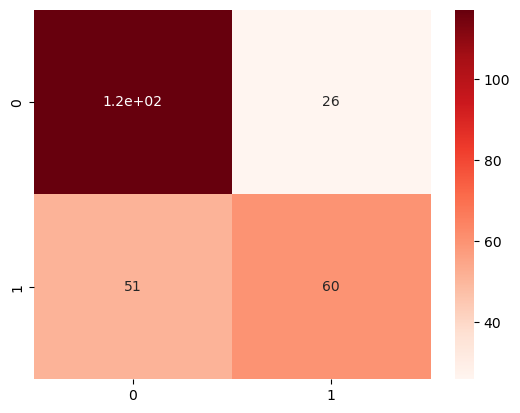

In [86]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, cmap='Reds')

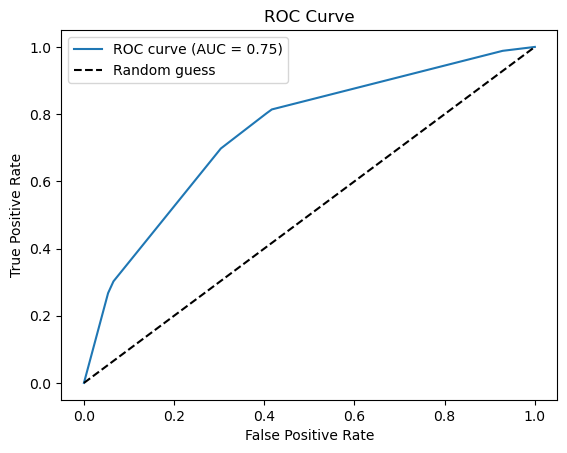

In [87]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute the probabilities of the positive class
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute the FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

#AUC
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [ ]:
Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

In [102]:
model=clf.fit(X_train,y_train)

[Text(0.5, 0.875, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.25, 0.625, 'x[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.125, 0.375, 'x[1] <= 127.5\ngini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.0625, 0.125, 'gini = 0.153\nsamples = 203\nvalue = [186, 17]'),
 Text(0.1875, 0.125, 'gini = 0.469\nsamples = 48\nvalue = [30, 18]'),
 Text(0.375, 0.375, 'x[5] <= 26.95\ngini = 0.487\nsamples = 181\nvalue = [105, 76]'),
 Text(0.3125, 0.125, 'gini = 0.105\nsamples = 36\nvalue = [34, 2]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 145\nvalue = [71, 74]'),
 Text(0.75, 0.625, 'x[5] <= 28.7\ngini = 0.232\nsamples = 82\nvalue = [11, 71]'),
 Text(0.625, 0.375, 'x[5] <= 25.35\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6875, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.875, 0.375, 'x[6] <= 1.428\ngini = 0.157\nsamples = 70\nvalue = [6, 64]'),


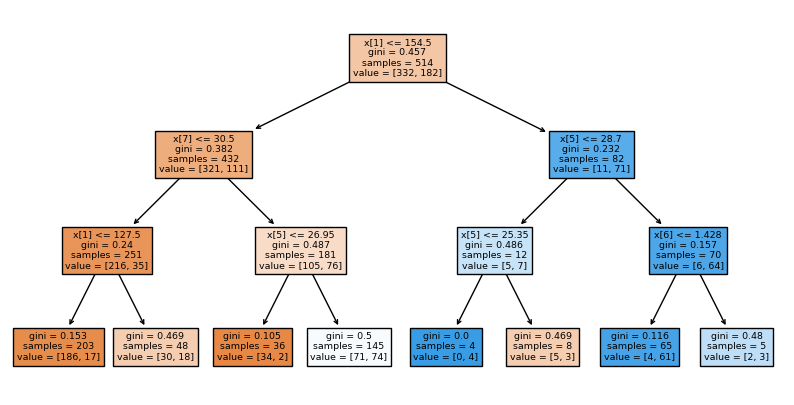

In [103]:
from sklearn import tree
plt.figure(figsize=(10,5))
tree.plot_tree(model,filled=True)

In [104]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896


## From Tree diagram we can see that dataset is splitted from the 1st index position i.e Glucose(root node). Decision tree reached upto maximum depth=3.

In [ ]:
Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

In [116]:
# sensitivity analysis
for col in X.columns:
    X_test_sensitivity = X_test.copy()
    X_test_sensitivity[col] = X_test_sensitivity[col].max()
    y_pred_sensitivity = model.predict(X_test_sensitivity)
    print(f"Sensitivity analysis for {col}: {y_pred_sensitivity}")

Sensitivity analysis for Pregnancies: [1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1
 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0
 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0
 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0]
Sensitivity analysis for Glucose: [1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 